# Practical case 3 - Crimen data

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In the `data/crime_data.csv` there are the crimes number for each 100.000 inhabitants in each state of USA, as well as the percentage of urban population. The crimes have been grouped like: `Murder`, `Assault` and `Rape`.

Segment that dataset using `k-means` and get the centroids of each cluster and the states list of each cluster.

### Load data

In [2]:
import pandas as pd

# Read file
crimes = pd.read_csv("data/crime_data.csv", sep = ",")
crimes.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


For segmenting data, we don't need the `State` variable. So, we remove it of data:

In [3]:
col_names = list(crimes.columns)
col_names.remove('State')

data = crimes[col_names]
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


Due to there are more of two dimensions, for selecting the number of clusters, we have to use the Silhouette method:

In [4]:
# blobs       -> data
# figure_name -> figure name
# max_k       -> maximum of clusters
# n_init      -> maximum number which the algorithm will be executed
def plot_silhouette(data, figure_name, max_k = 10, n_init = 10):
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import KMeans
    #from sklearn.spatial.distance import cdist
    
    silhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(data)
        silhouette_avgs.append(silhouette_score(data, kmean.labels_))
        
    plot(range(2, max_k), silhouette_avgs)
    xlabel('k')
    title(figure_name)

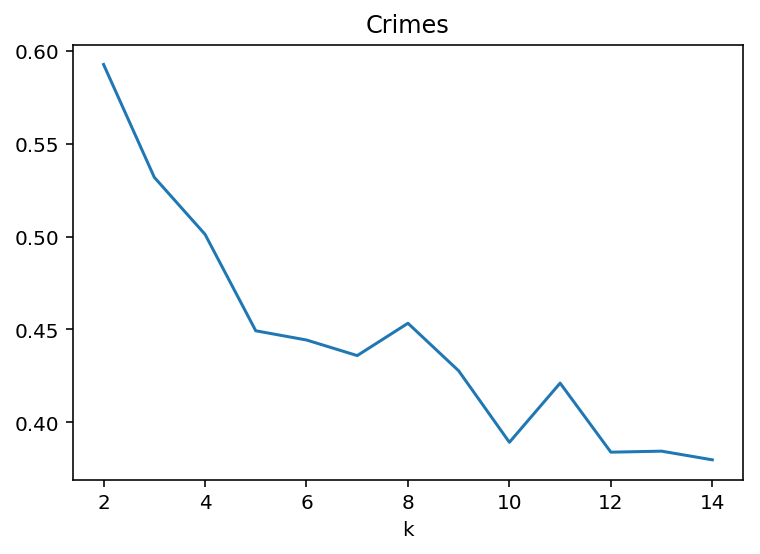

In [5]:
plot_silhouette(np.copy(data), 'Crimes', 15, 10)

With that result, we can say the maximum number of clusters is 8. So, let's use `K-Means` algorithm with 8 clusters:

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Create KMeans
kmeans = KMeans(n_clusters = 8, n_init = 10, random_state = 1).fit(np.copy(data))

# Let's predict the cluster in which belong the mammals
clusters = kmeans.predict(data)

# Print the cluster of each mammals
for c in range(max(clusters) + 1) :
    print('Cluster', c)
    print(crimes['State'][clusters == c])
    print('\n')

Cluster 0
3      Arkansas
5      Colorado
9       Georgia
24     Missouri
41    Tennessee
42        Texas
Name: State, dtype: object


Cluster 1
10           Hawaii
14             Iowa
18            Maine
22        Minnesota
28    New Hampshire
33     North Dakota
40     South Dakota
44          Vermont
47    West Virginia
48        Wisconsin
Name: State, dtype: object


Cluster 2
8            Florida
32    North Carolina
Name: State, dtype: object


Cluster 3
1             Alaska
23       Mississippi
39    South Carolina
Name: State, dtype: object


Cluster 4
6      Connecticut
11           Idaho
13         Indiana
15          Kansas
16        Kentucky
25         Montana
26        Nebraska
34            Ohio
37    Pennsylvania
43            Utah
Name: State, dtype: object


Cluster 5
0       Alabama
7      Delaware
12     Illinois
17    Louisiana
21     Michigan
27       Nevada
31     New York
Name: State, dtype: object


Cluster 6
2        Arizona
4     California
19      Maryland
30